In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [4]:
y_train = y_train.reshape(-1,)  # Convert 2D t 1D array
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [5]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
len(classes)

10

In [6]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

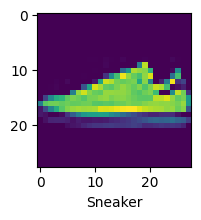

In [7]:
plot_sample(X_train, y_train, 6)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7305 - loss: 0.7452 - val_accuracy: 0.8627 - val_loss: 0.3730
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8675 - loss: 0.3701 - val_accuracy: 0.8830 - val_loss: 0.3224
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8837 - loss: 0.3158 - val_accuracy: 0.8884 - val_loss: 0.3024
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8963 - loss: 0.2789 - val_accuracy: 0.8960 - val_loss: 0.2789
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9034 - loss: 0.2619 - val_accuracy: 0.9062 - val_loss: 0.2658
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9149 - loss: 0.2342 - val_accuracy: 0.9039 - val_loss: 0.2637
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9192 - loss: 0.2177 - val_accuracy: 0.9075 - val_loss: 0.2577
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9228 - loss: 0.2085

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Mean Absolute Error: {test_mae}")

# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the index of the highest probability

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_labels)
mse = mean_squared_error(y_test, y_pred_labels)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_labels)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9078 - loss: 0.2641
Test Loss: 0.25843504071235657
Test Mean Absolute Error: 0.9093000292778015
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Mean Absolute Error (MAE): 0.3038
Mean Squared Error (MSE): 1.3068
Root Mean Squared Error (RMSE): 1.143153532995459
R-squared (R2): 0.8416


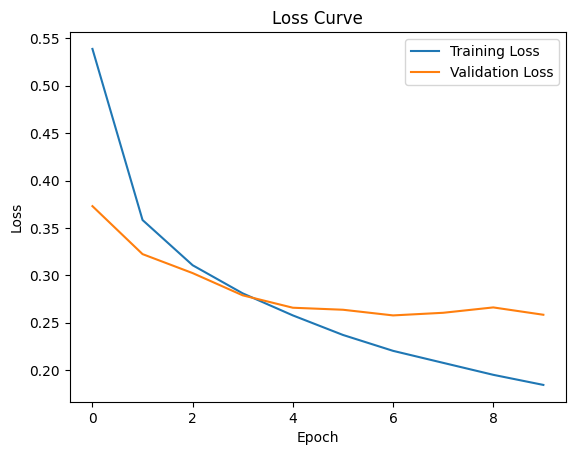

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()